In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Prawn/'

In [6]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

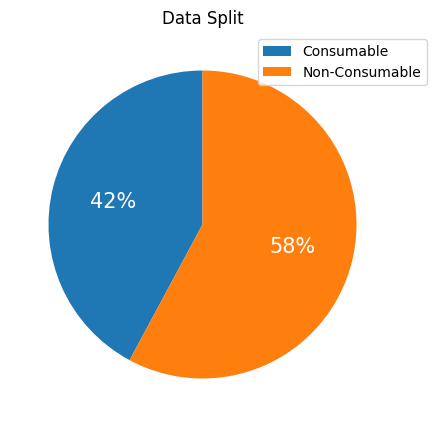

In [7]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [8]:
width = 100
height = 100

In [9]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 26.91192


In [10]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(121, 100, 100, 3)

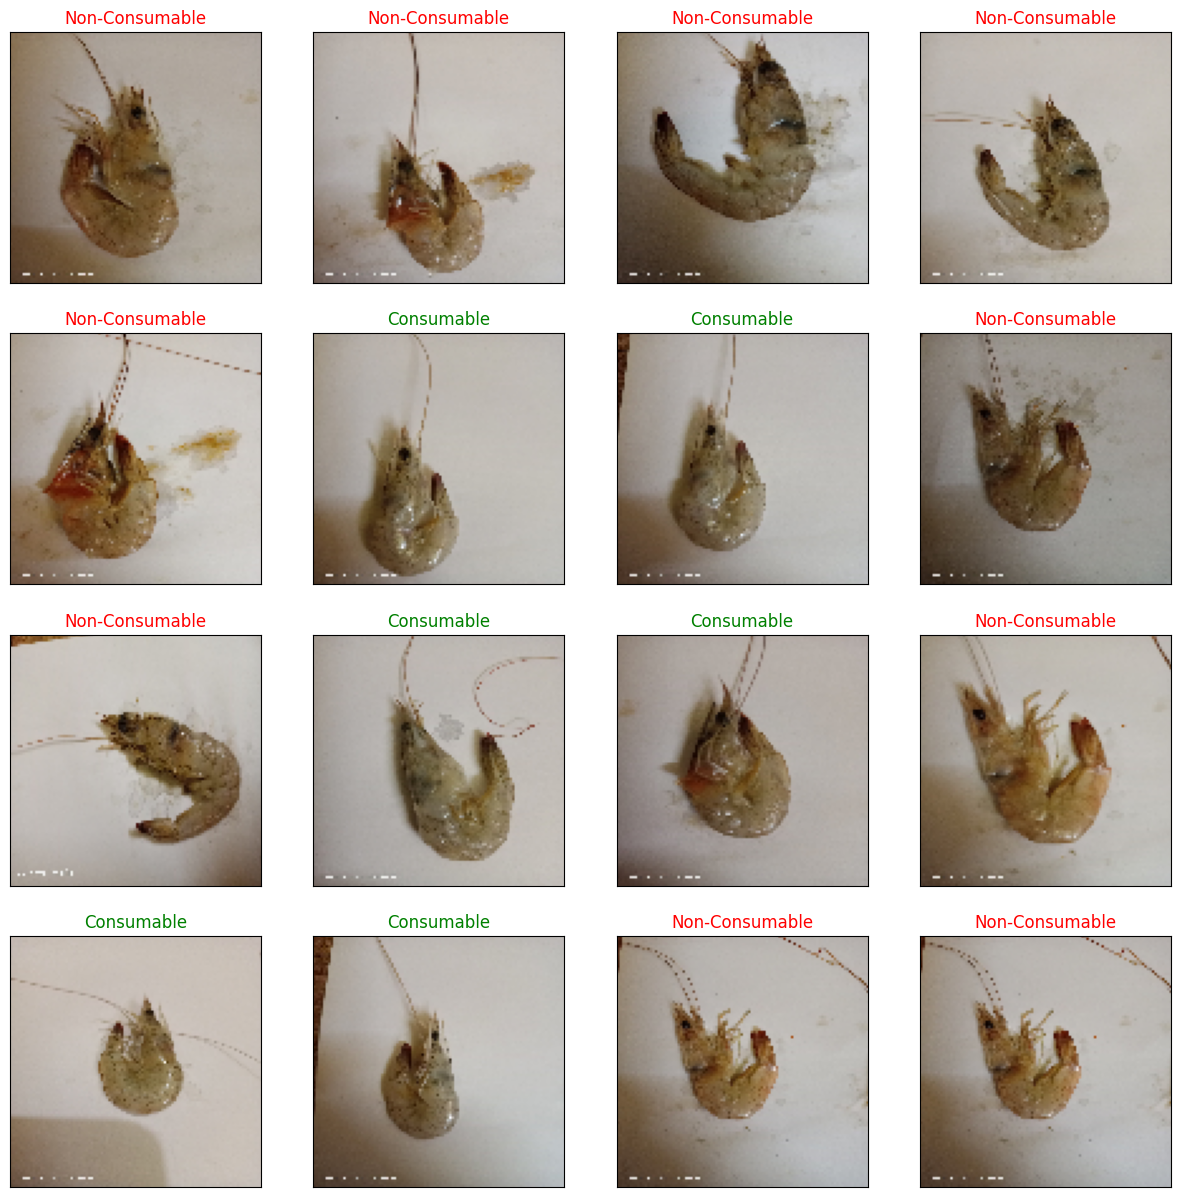

In [11]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [13]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [14]:
def resnet_model(input_shape=(width,height,3)):
    resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = layers.Flatten()(resnet.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=resnet.input, outputs=predictions)
    for layer in resnet.layers:
        layer.trainable = False
    return model
model = resnet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 98s 1us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5672 - loss: 2.0796 - val_accuracy: 0.4595 - val_loss: 0.9464
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3741 - loss: 0.9994 - val_accuracy: 0.5405 - val_loss: 0.7830
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6555 - loss: 0.6543 - val_accuracy: 0.4595 - val_loss: 0.7616
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4213 - loss: 0.7596 - val_accuracy: 0.5405 - val_loss: 0.7921
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5906 - loss: 0.7222 - val_accuracy: 0.5405 - val_loss: 0.6644
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6750 - loss: 0.6568 - val_accuracy: 0.7297 - val_loss: 0.6601
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6615 - loss: 0.6597 - val_accuracy: 0.5405 - val_loss: 0.6815
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 916ms/step - accuracy: 0.5632 - loss: 0.6732 - 

2/2 - 1s - 455ms/step - accuracy: 0.5405 - loss: 0.6374


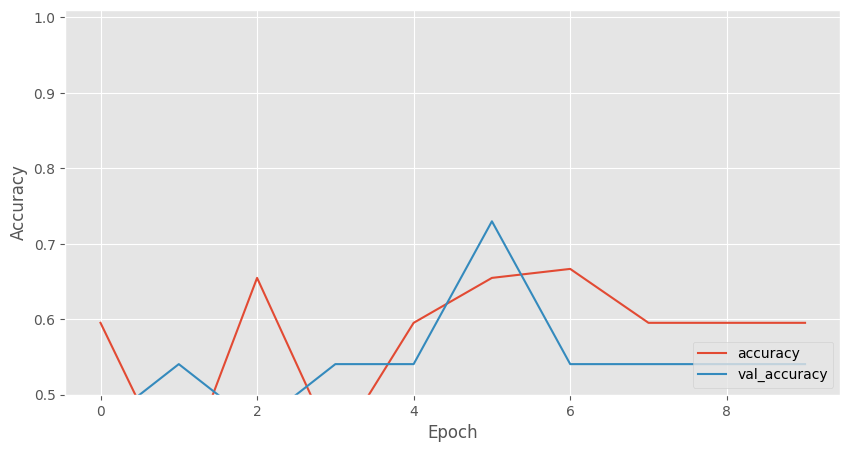

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [16]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5270 - loss: 0.6430


In [17]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.6374431848526001
compile_metrics : 0.5405405163764954


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


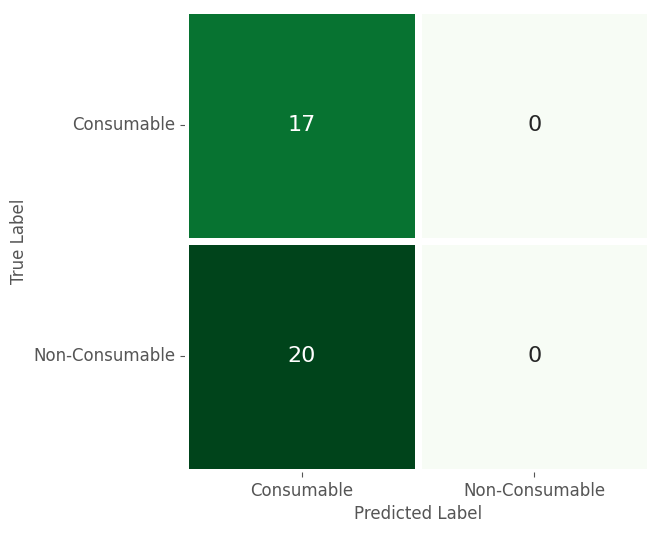

In [18]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()

In [22]:
files = ['Consumable', 'Non-Consumable']
address = 'D:/VIT/Meat-Quality-Assessment-and-Classification/Dataset/Prawn/'

In [23]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

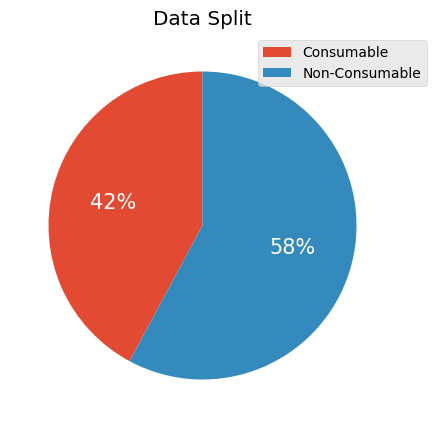

In [24]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [25]:
width = 100
height = 100

In [26]:
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 27.31152


In [27]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(121, 100, 100, 3)

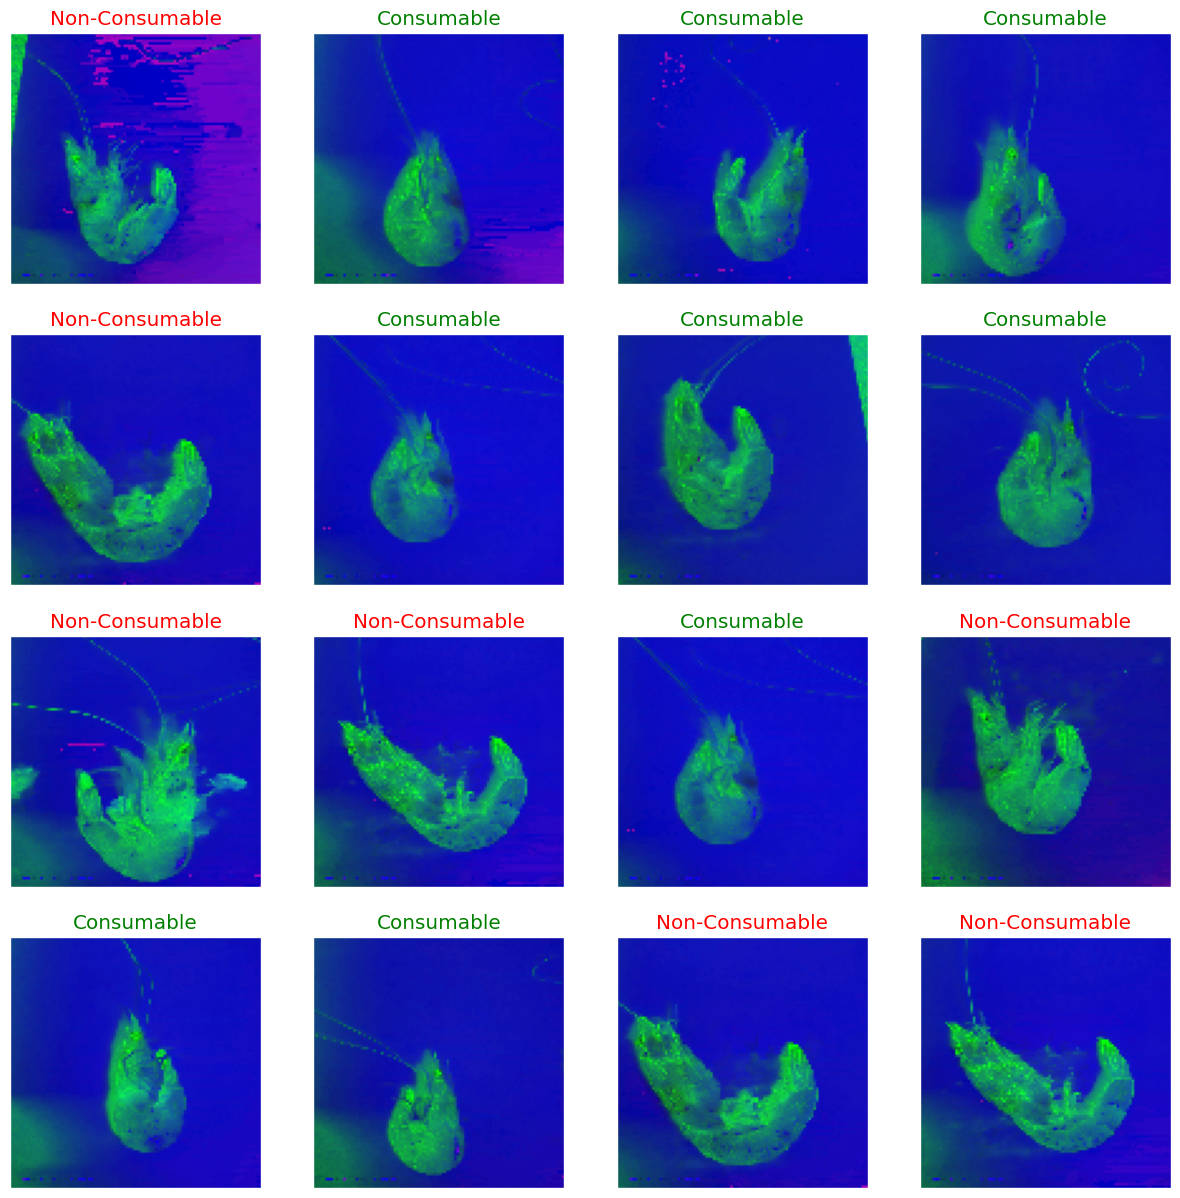

In [28]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [30]:
X = image_data / 360.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [31]:
def resnet_model(input_shape=(width,height,3)):
    resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = layers.Flatten()(resnet.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=resnet.input, outputs=predictions)
    for layer in resnet.layers:
        layer.trainable = False
    return model
model = resnet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4702 - loss: 3.1915 - val_accuracy: 0.5676 - val_loss: 2.0162
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 545ms/step - accuracy: 0.5612 - loss: 1.6549 - val_accuracy: 0.7568 - val_loss: 1.1648
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.8955 - loss: 0.5495 - val_accuracy: 0.6757 - val_loss: 2.5404
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - accuracy: 0.9626 - loss: 0.1272 - val_accuracy: 0.8108 - val_loss: 0.9622
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.9842 - loss: 0.1272 - val_accuracy: 0.7838 - val_loss: 2.0318
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - accuracy: 0.9410 - loss: 0.3551 - val_accuracy: 0.8378 - val_loss: 0.9468
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 589ms/step - accuracy: 0.9823 - loss: 0.0475 - val_accuracy: 0.7838 - val_loss: 1.2445
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 595ms/step - accuracy: 1.0000 - loss: 6.2365e-05 - val_accuracy: 0.7838 - val_los

2/2 - 1s - 262ms/step - accuracy: 0.7838 - loss: 2.5350


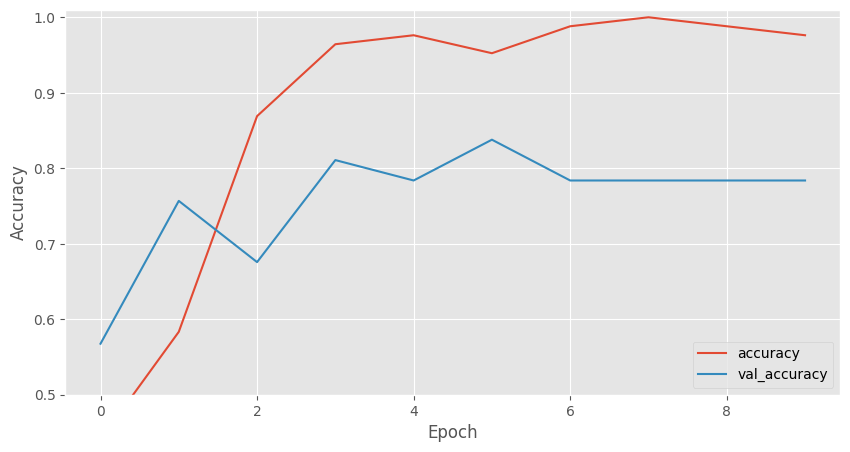

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
result=model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7829 - loss: 2.5070


In [34]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 2.535013198852539
compile_metrics : 0.7837837934494019


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


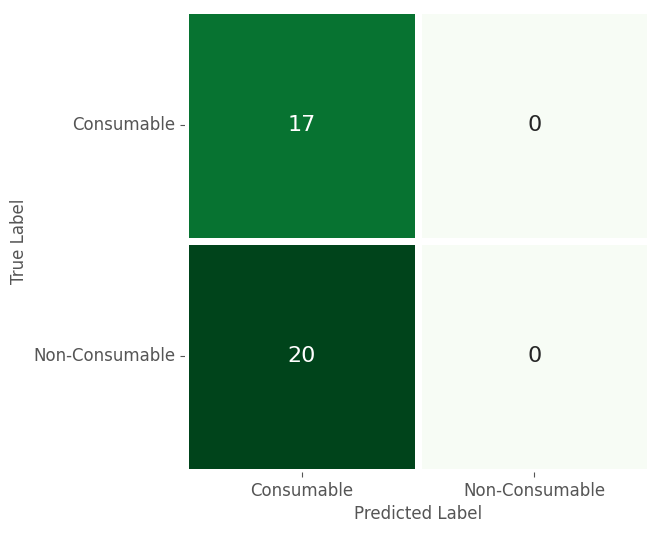

In [36]:
y_pred = model.predict(test_images)
def toClass(pred):
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
    return class_
cm = confusion_matrix(test_labels,toClass(y_pred))
df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.show()